In [1]:
from astropy.io import fits
from astropy.table import Table, Column, hstack
import pdb
import numpy as np
import rafias_lib as rl
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

## 11/10

### Sub320

In [16]:
files_sub = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB-60*_1_481_SE_*/*.slp.fits'))
len(files_sub)

306

In [ ]:
centers_sub = rl.gen_center_g2d(166,160,5,400,2,2,0,files_sub)[0]

In [ ]:
rt_sub = rl.radius_testing(centers_sub, 20, 120, 1, 40, 140, 1, 60, 160, 1, files_sub) 

In [ ]:
rt_sub.write('rt_sub.csv')

### Sub640

In [ ]:
files_sub640 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB640-60*_1_481_SE_*/*.slp.fits'))
len(files_sub640)

In [ ]:
centers_sub640 = rl.gen_center_g2d(326,320,5,400,2,2,0,files_sub640)[0]

In [ ]:
rt_sub640 = rl.radius_testing(centers_sub640, 20, 120, 1, 40, 140, 1, 60, 160, 1, files_sub640) 

In [ ]:
rt_sub640.write('rt_sub640.csv')

### Full

In [ ]:
files_full = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              'NRCN821WLP8FULL1-*_1_481_SE_*/*.red.fits'))
len(files_full)

In [ ]:
centers_full = rl.gen_center_g2d(1405,1036,5,400,4,4,0, files_full, red = True)[0]

In [ ]:
rt_full = rl.radius_testing(centers_full, 20, 120, 1, 40, 140, 1, 60, 160, 1, files_full) 

In [ ]:
rt_full.write('rt_full.csv')

### Clr

In [ ]:
files_clr = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB1*_481_SE_2016-*/*.slp.fits'))
len(files_clr)

In [ ]:
centers_clr = rl.gen_center_g2d(164,161,5,3500,2,2,0, files_clr)[0]

In [ ]:
rt_clr = rl.radius_testing(centers_clr, 1, 11, 0.2, 3, 13, 0.2, 5, 15, 0.2, files_clr) 

In [ ]:
rt_clr.write('rt_clr.csv')

## Old stuff

In [30]:
#Importing a1 files
hdu_filenames_a11 = glob.glob('/data/External/ISIMCV3_unzipped/NRCN821/fitsfilesonly/raw_separated_MMM/\
                    NRCN821WLP8SUB640-6012195832_1_481_SE_2016-01-12T20h57m57/*.slp.fits')
len(hdu_filenames_a11)

60

In [31]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.pyc'>

In [32]:
centers_a11 = rl.gen_center_g2d(326, 320, 5, 450, 2, 2, 0, hdu_filenames_a11)

In [33]:
centers_a11

([(Parameter('x_mean', value=326.039593477),
   Parameter('y_mean', value=319.792302524)),
  (Parameter('x_mean', value=326.061448238),
   Parameter('y_mean', value=319.826010091)),
  (Parameter('x_mean', value=326.024322408),
   Parameter('y_mean', value=319.80314457)),
  (Parameter('x_mean', value=325.999840844),
   Parameter('y_mean', value=319.796643391)),
  (Parameter('x_mean', value=325.971188862),
   Parameter('y_mean', value=319.801376773)),
  (Parameter('x_mean', value=326.00450314),
   Parameter('y_mean', value=319.809584502)),
  (Parameter('x_mean', value=326.063509541),
   Parameter('y_mean', value=319.838655129)),
  (Parameter('x_mean', value=326.097309169),
   Parameter('y_mean', value=319.843601422)),
  (Parameter('x_mean', value=326.040642999),
   Parameter('y_mean', value=319.833951745)),
  (Parameter('x_mean', value=326.015421129),
   Parameter('y_mean', value=319.8479163)),
  (Parameter('x_mean', value=325.97611968),
   Parameter('y_mean', value=319.827353943)),
  (P

In [34]:
r_src_low = 80
r_src_up = 100
inc = 5

In [35]:
stdev_table = rl.radius_testing(centers_a11[0], r_src_low, r_src_up, inc, r_src_low + inc, r_src_up + (4*inc), inc,
                                r_src_low + (2*inc), r_src_up + (5*inc), inc, hdu_filenames_a11)
stdev_table

The minimum Standard deviation is 0.003226
It occurs for the radius r = 90.000000
It occurs for the inner radius r_in = 95.000000
It occurs for the outer radius r_out = 100.000000


Median_Res_Flux,St_Dev,norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64,float64,float64
3468390.04466,11270.112854,0.00324937873449,80.0,85.0,90.0,5.0,5.0
3477373.45505,11266.4323128,0.00323992589764,80.0,85.0,95.0,5.0,10.0
3482746.52968,11269.8300581,0.00323590303288,80.0,85.0,100.0,5.0,15.0
3486596.13762,11285.3890922,0.00323679274763,80.0,85.0,105.0,5.0,20.0
3489473.10719,11297.284385,0.00323753301371,80.0,85.0,110.0,5.0,25.0
3491769.13808,11307.27452,0.00323826520967,80.0,85.0,115.0,5.0,30.0
3493681.54628,11318.9166303,0.00323982494695,80.0,85.0,120.0,5.0,35.0
3485871.27568,11265.7297331,0.00323182608941,80.0,90.0,95.0,10.0,5.0
3489318.77152,11272.1084593,0.00323046107202,80.0,90.0,100.0,10.0,10.0


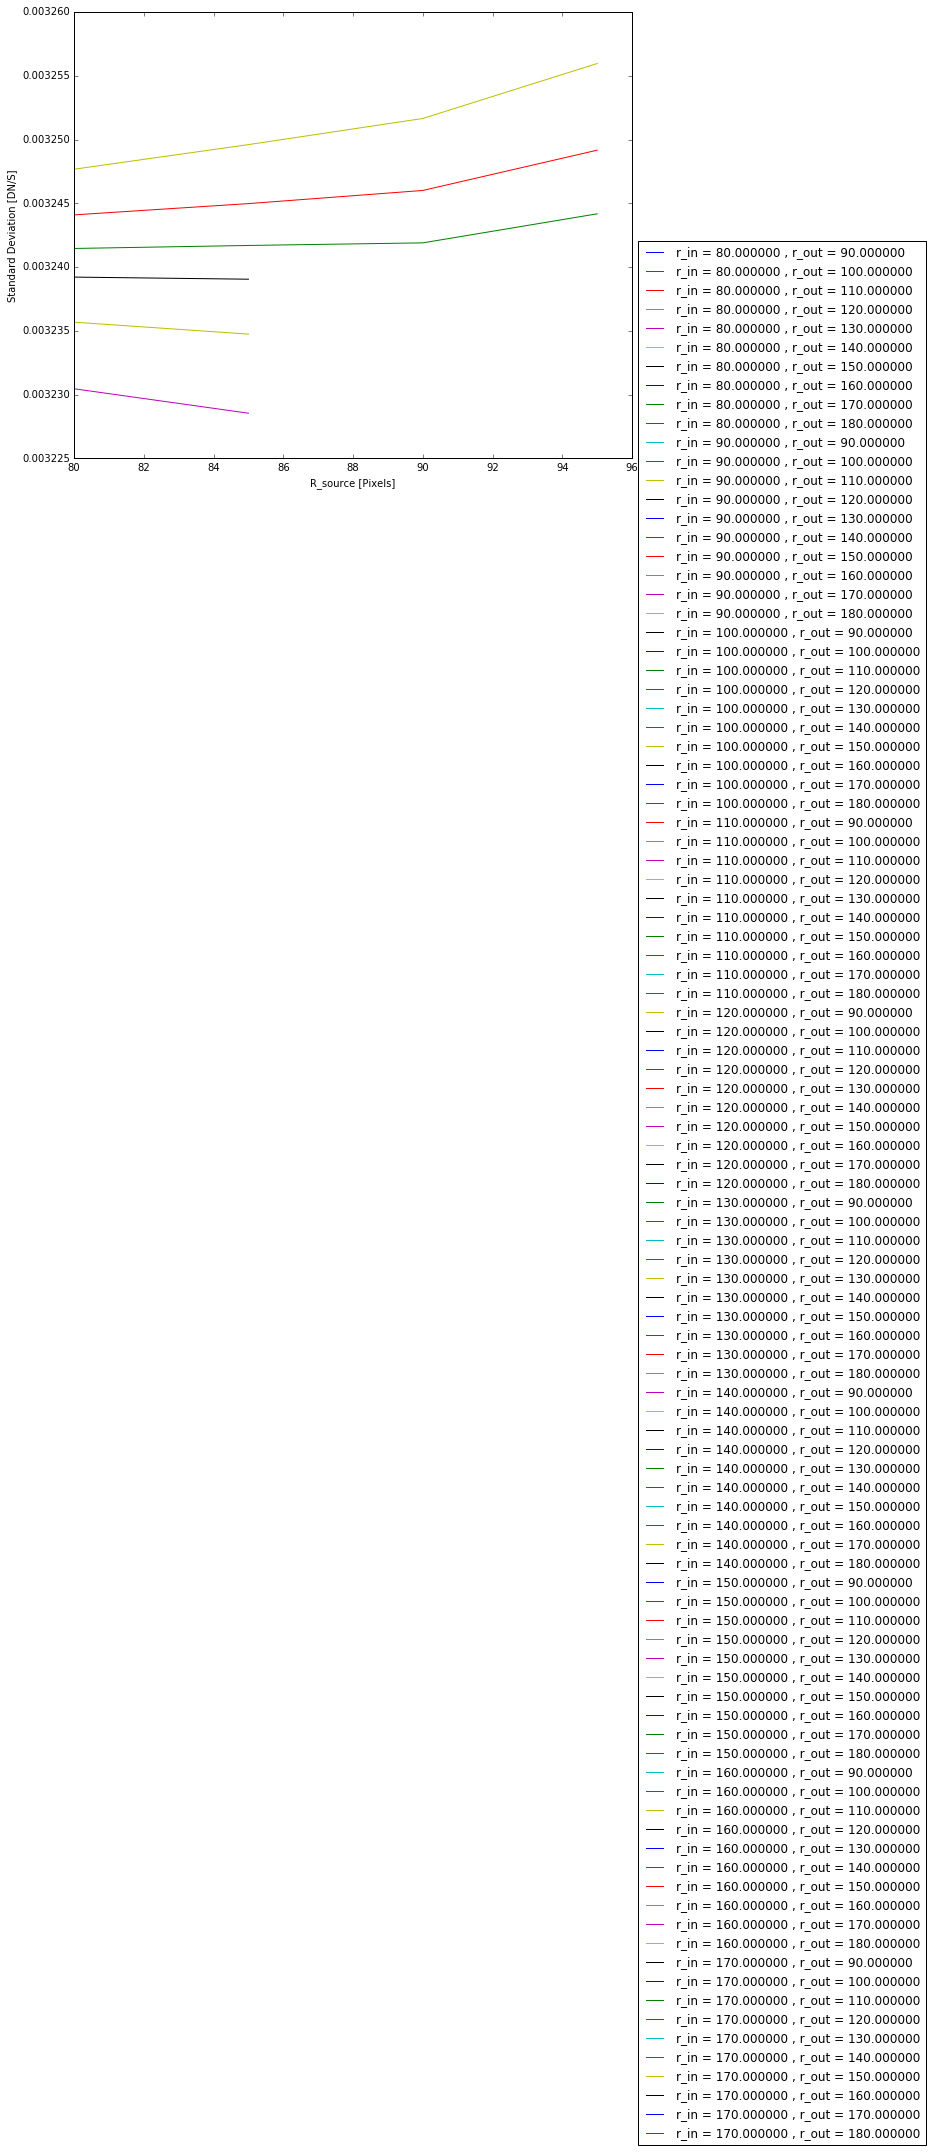

In [36]:
for r_in in range(80, 180, 10):
    for r_out in range(90, 190, 10):
        index = (stdev_table['r_in']==r_in) & (stdev_table['r_out']==r_out)
        plt.plot(stdev_table['r_source'][index], stdev_table['norm_stdev'][index], label = 'r_in = %f , r_out = %f' % (r_in, r_out))
        plt.xlabel('R_source [Pixels]')
        plt.ylabel('Standard Deviation [DN/S]')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

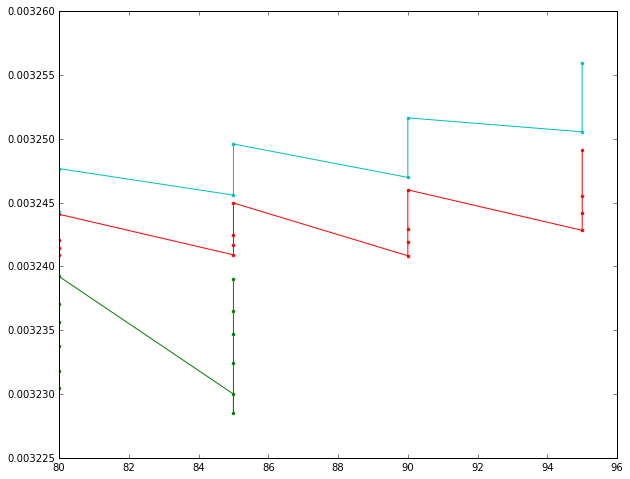

In [37]:
for r_in in range(80, 180, 10):
    indices = stdev_table['r_in'] == r_in
    plt.plot(stdev_table['r_source'][indices], ((stdev_table['St_Dev'][indices])/(stdev_table['Median_Res_Flux'][indices])), '.-')

### Radius testing for red data

In [38]:
#Importing a1 files
hdu_filenames_red = glob.glob('/data/External/ISIMCV3_unzipped/NRCN821/fitsfilesonly/reduced_separated_MMM/'+
                              'NRCN821WLP8FULLQ-6013001651_1_481_SE_2016-01-13T01h03m43/*.red.fits')
len(hdu_filenames_red)

55

In [39]:
centers_red = rl.gen_center_g2d(1405, 1036, 5, 400, 4, 4, 0, hdu_filenames_red, red_files = True)
centers_red

([(Parameter('x_mean', value=1404.8740747),
   Parameter('y_mean', value=1036.077715)),
  (Parameter('x_mean', value=1404.86165718),
   Parameter('y_mean', value=1036.05868099)),
  (Parameter('x_mean', value=1404.91865378),
   Parameter('y_mean', value=1036.03837161)),
  (Parameter('x_mean', value=1404.97130444),
   Parameter('y_mean', value=1036.01087027)),
  (Parameter('x_mean', value=1404.98631047),
   Parameter('y_mean', value=1036.02450637)),
  (Parameter('x_mean', value=1404.99047623),
   Parameter('y_mean', value=1036.03216172)),
  (Parameter('x_mean', value=1405.00795605),
   Parameter('y_mean', value=1036.01796032)),
  (Parameter('x_mean', value=1405.04961635),
   Parameter('y_mean', value=1036.03791826)),
  (Parameter('x_mean', value=1405.02649581),
   Parameter('y_mean', value=1036.04473843)),
  (Parameter('x_mean', value=1404.97411041),
   Parameter('y_mean', value=1036.01511256)),
  (Parameter('x_mean', value=1404.96147539),
   Parameter('y_mean', value=1035.99713778)),
  

In [40]:
stdev_table = rl.radius_testing(centers_red[0], 30, 130, 10, 50, 150, 10, 70, 170, 10, hdu_filenames_red, 
                                red_files = True)
stdev_table

The minimum Standard deviation is 0.002468
It occurs for the radius r = 60.000000
It occurs for the inner radius r_in = 80.000000
It occurs for the outer radius r_out = 90.000000


Median_Res_Flux,St_Dev,norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64,float64,float64
643582.979853,1715.17732509,0.0026650445689,30.0,50.0,70.0,20.0,20.0
752675.098731,1967.9200116,0.00261456771311,30.0,50.0,80.0,20.0,30.0
810627.181275,2098.21519495,0.00258838494861,30.0,50.0,90.0,20.0,40.0
845464.458896,2177.43900462,0.00257543529088,30.0,50.0,100.0,20.0,50.0
868251.877693,2228.0155068,0.00256609350817,30.0,50.0,110.0,20.0,60.0
884118.139222,2262.22813042,0.0025587396413,30.0,50.0,120.0,20.0,70.0
895593.637543,2288.10733951,0.00255484992701,30.0,50.0,130.0,20.0,80.0
904243.173594,2311.3645718,0.00255613162399,30.0,50.0,140.0,20.0,90.0
910954.19631,2333.77280647,0.00256189917772,30.0,50.0,150.0,20.0,100.0


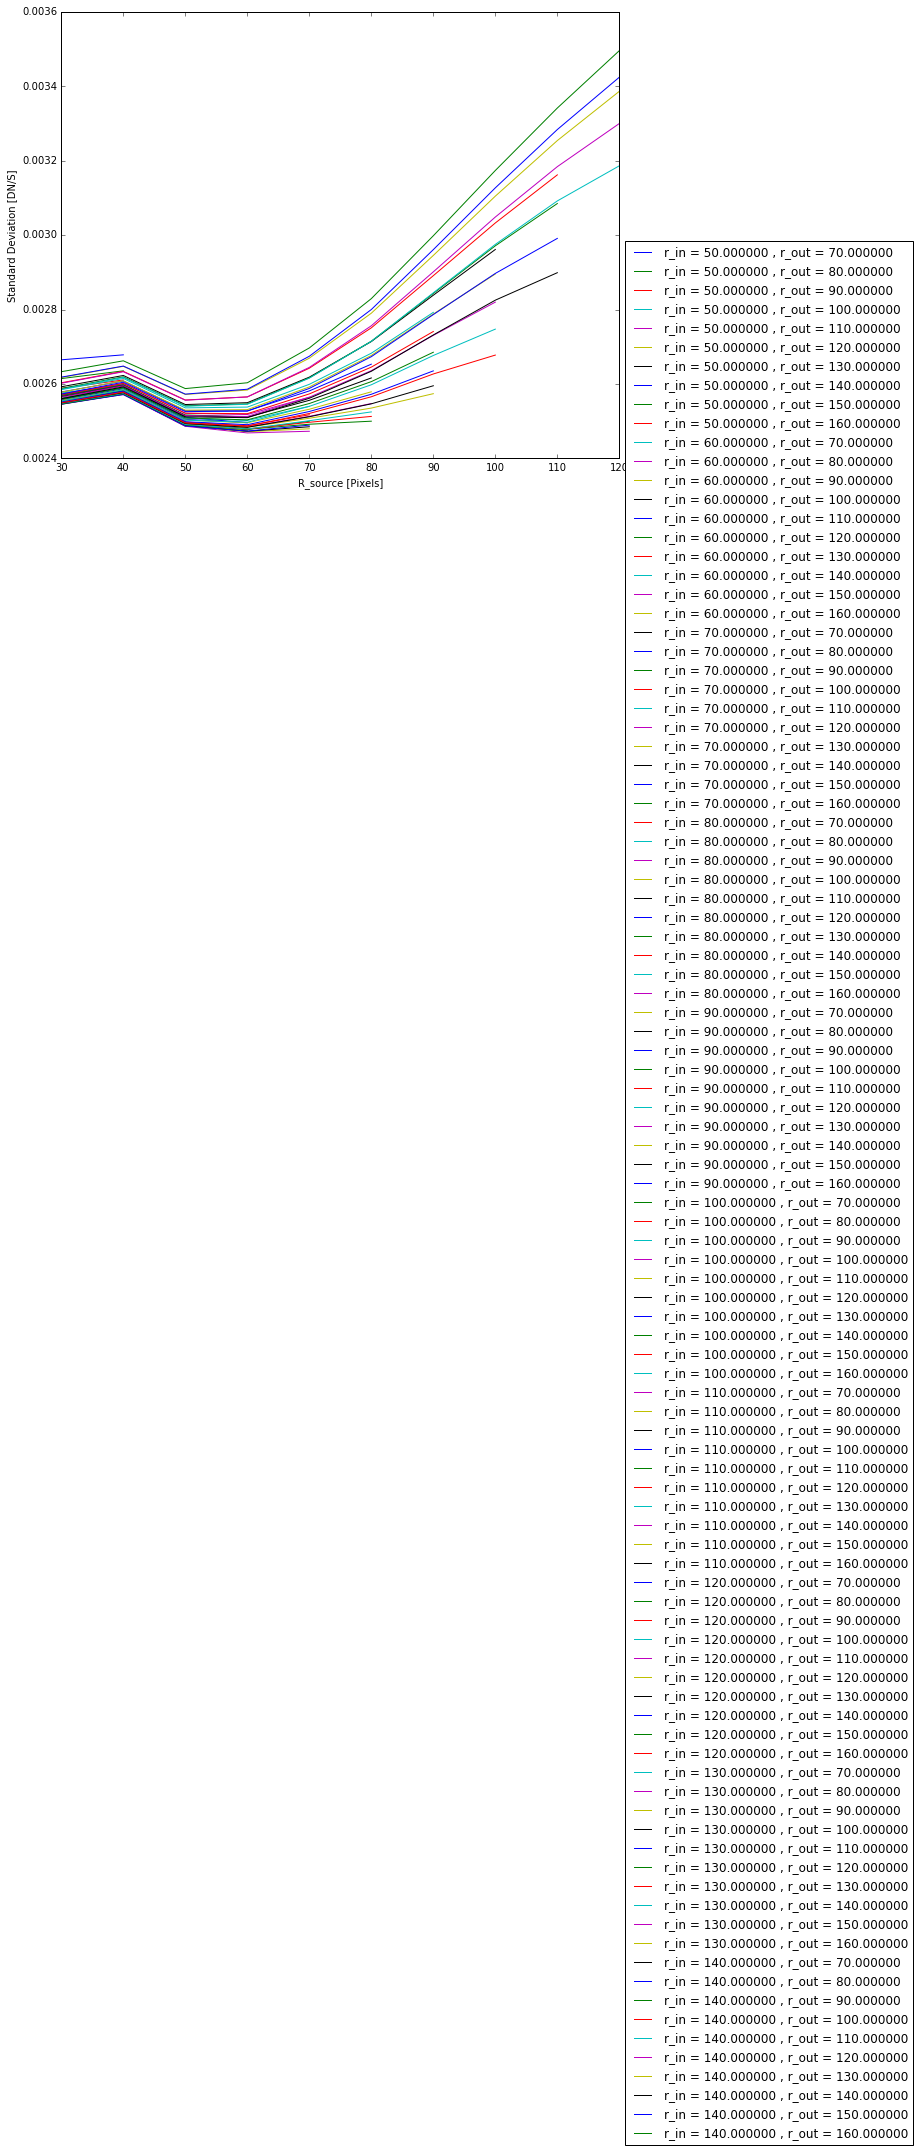

In [42]:
for r_in in range(50, 150, 10):
    for r_out in range(70, 170, 10):
        index = (stdev_table['r_in']==r_in) & (stdev_table['r_out']==r_out)
        plt.plot(stdev_table['r_source'][index], stdev_table['norm_stdev'][index], label = 'r_in = %f , r_out = %f' % (r_in, r_out))
        plt.xlabel('R_source [Pixels]')
        plt.ylabel('Standard Deviation [DN/S]')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

## Re-parametrizing radius testing code

In [ ]:
reload(rl)
stdev_table = rl.radius_testing(centers_red[0], 30, 130, 10, 50, 150, 10, 70, 170, 10, hdu_filenames_red, 
                                red_files = True)
stdev_table

In [ ]:
diff_in = stdev_table['rIn - r']
diff_out = stdev_table['rOut - rIn']
for dIn in diff_in:
    for dOut in diff_out:
        index = (diff_in==dIn) & (diff_out==dOut)
        plt.plot(stdev_table['r_source'][index], stdev_table['norm_stdev'][index], 
                 label = 'diff_in = %f , diff_out = %f' % (dIn, dOut))
        plt.xlabel('R_source [Pixels]')
        plt.ylabel('Standard Deviation [DN/S]')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
#         pdb.set_trace()